In [1]:
import numpy as np
import problem.deflect as deflect
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# variables for plasma (cm, cm/s)
ri = .9
rs = 15.3
li = 0.2
v0 = 5.24e9

In [3]:
# returns a norm/total difference between two flux
# images where the images are normalized with respect to 
# total proton flux. The quantity diff = sqrt(sum((recon-orig)^2)
# This quantity gives us an idea of how different two flux images are.
def diff(recon, orig):
    # total protons in flux images
    recon_count = np.sum(np.sum(recon))
    orig_count = np.sum(np.sum(orig))
    
    #normalized flux images
    recon_norm = recon/recon_count
    orig_norm = orig/orig_count
    
    diff = np.sqrt(np.sum(np.square(recon_norm - orig_norm)))
    
    return diff

In [4]:
# 2D histogram colorplot from praline
def hist2D_plot(array, bin_um, title):
    '''
    Genereates the 2D histogram plot based on 2D array
    Parameters
    ----------
    array (2D array): The array that will be plotted on a 2D histogram
    bin_um (float): Length of the side of a bin, in cm
    type (string): type of file input
    title (string): title of the plot
    Returns
    -------
    "title".png (image):2D histogram Plot
    '''
    print ("Constructing " + title + " Plot")
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 32,
        }

    num_binsX = array.shape[0]
    num_binsY = array.shape[1]
    delta = bin_um/10000.0
    dmax = (delta * num_binsX)/2.0

    x = np.zeros(array.shape)
    y = np.zeros(array.shape)
    for i in range(array.shape[0]):
        xx = -dmax + i*delta
        for j in range(array.shape[1]):
            yy = -dmax + j*delta
            x[i,j] = xx
            y[i,j] = yy

    # Intiating plot
    fig = plt.figure()
    fig.set_figwidth(15.0)
    fig.set_figheight(12.0)
    # Making plot
    ax = fig.add_subplot(1,1,1)
    p = ax.pcolormesh(y, x, array, cmap=cm.afmhot, vmin= array.min(), vmax=array.max())
    ax.set_xlabel("X (cm)", fontdict=font)
    ax.set_ylabel("Y (cm)", fontdict=font)

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    ax.set_xlim(ymin,ymax)
    ax.set_ylim(xmin,xmax)

    plt.colorbar(p)

    ax.set_title(title,fontdict=font)
    fig.savefig(title+".png", format='png')

In [5]:
# load results from algorithm
x = np.loadtxt("solve/plasma_x.txt", delimiter=',')
y = np.loadtxt("solve/plasma_y.txt", delimiter=',')
phix = np.loadtxt("solve/phix399000.txt", delimiter=',')
phiy = np.loadtxt("solve/phiy399000.txt", delimiter=',')
print(v0)
wBx, wBy = deflect.reconstruct(ri, li, rs, v0, x, y, phix, phiy)
# number of protons to simulate
N = 30000000
bin_um = 10
image1 = deflect.fluximage(ri, li, rs, v0, x, y, N, wBx, wBy)

5240000000.0
Creating interpolator functions...
DONE
Interpolating proton deflections...
DONE
Histogramming protons...
DONE


Constructing flux recon 1 Plot


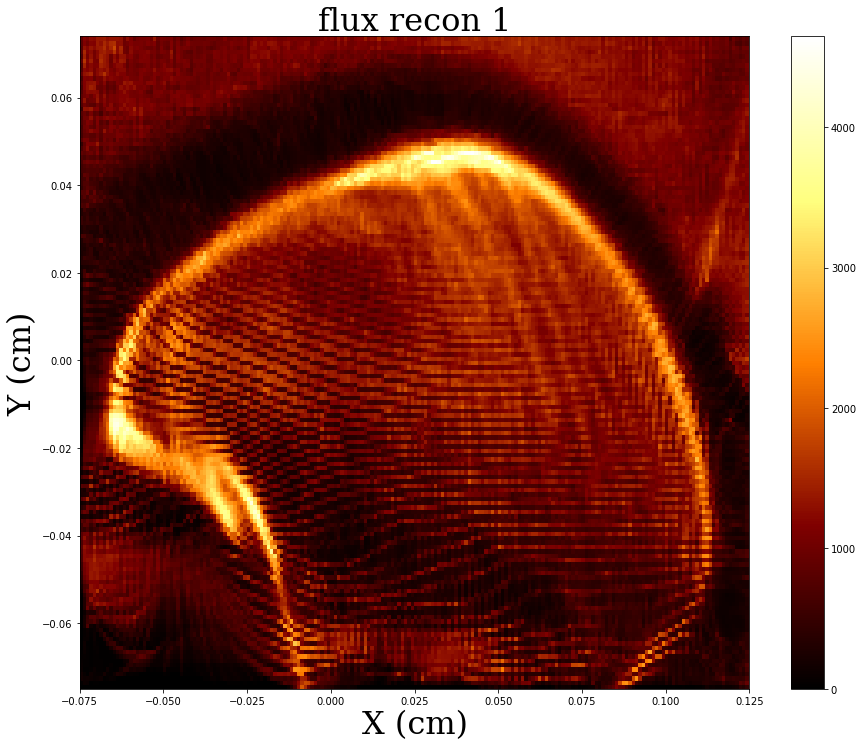

In [6]:
title1 = "flux recon 1"
hist2D_plot(image1, bin_um, title1)

In [139]:
# TEST 2, somehow does not even input velocity?
flux0 = np.loadtxt("flux0.txt", delimiter=',')
image2 = deflect.fluximage2(x, y, phix, phiy, flux0, scale_fact=1, scale_order=3)


Performing histogram...
DONE


Constructing flux recon 2 Plot


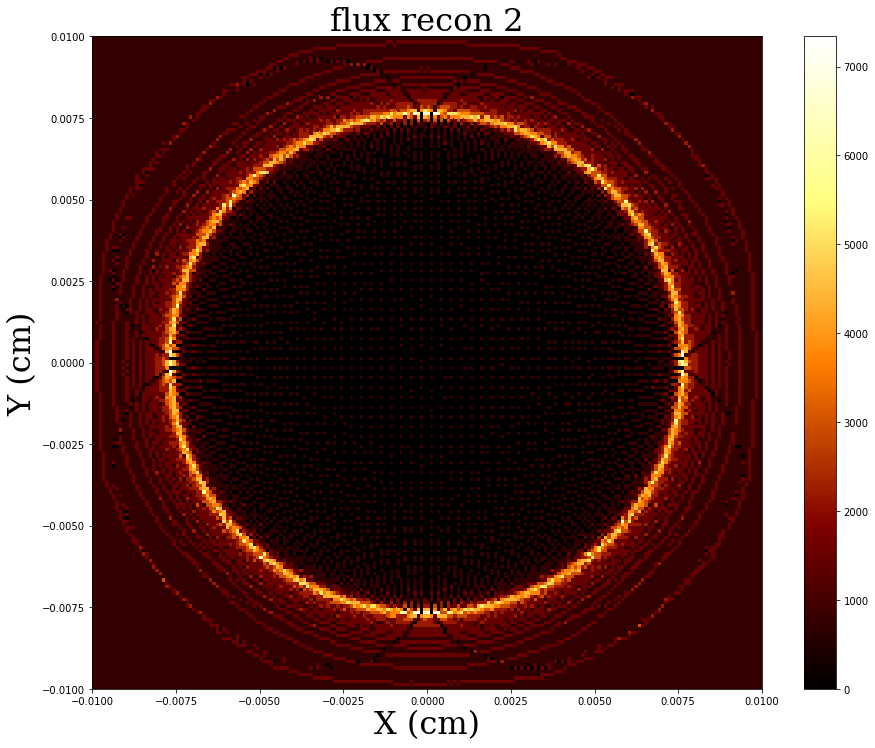

In [140]:
title2 = "flux recon 2"
hist2D_plot(image2, bin_um, title2)

In [141]:
Ntest = 30000000
image3 = deflect.fluximage3(ri, li, rs, v0, x, y, N, wBx, wBy, Ntest)

Histogramming reference...
Histogramming signal...
DONE


Constructing flux recon 3, Monte Carlo method Plot


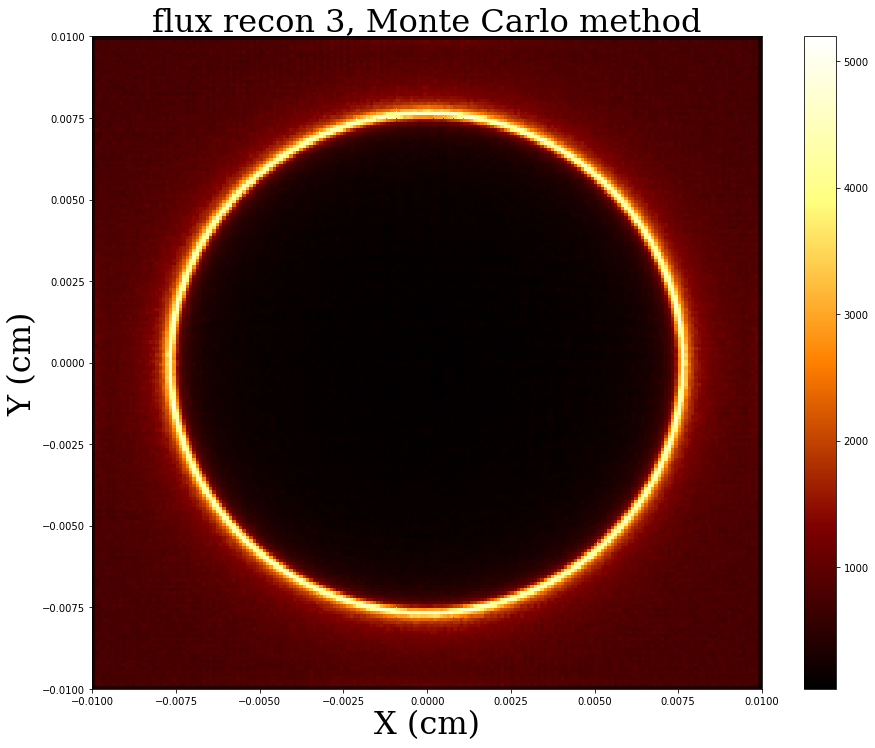

In [142]:
title3 = "flux recon 3, Monte Carlo method"
hist2D_plot(image3[0], bin_um, title3)

Constructing Original Flux Image Plot


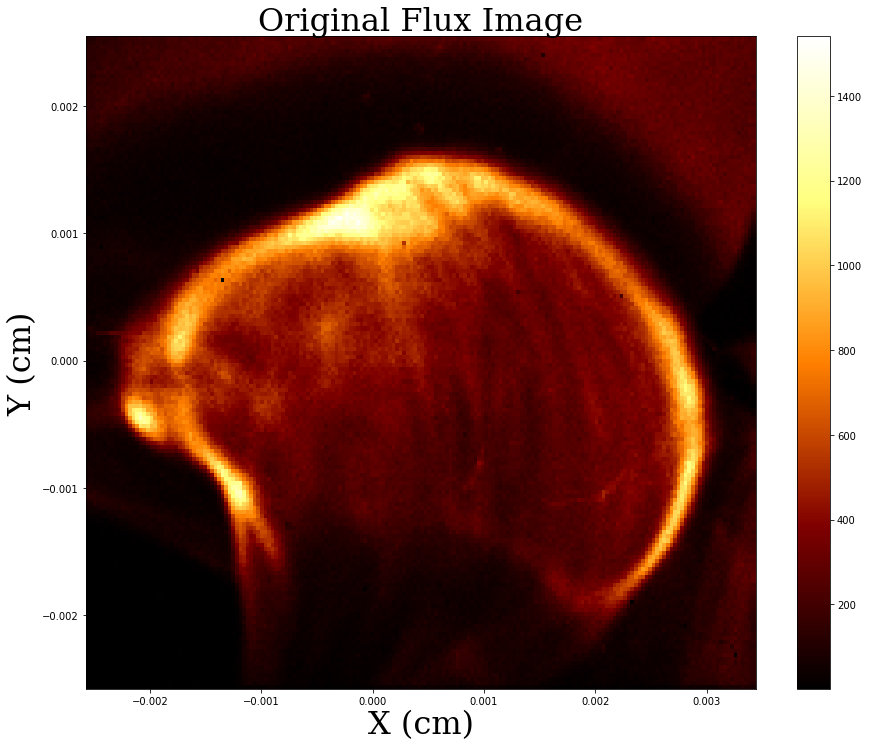

In [26]:
flux_real = np.loadtxt("original.txt", delimiter=',')
hist2D_plot(flux_real, bin_um, "Original Flux Image")

In [28]:
diff1 = diff(image1, flux_real)
#diff2 = diff(image2, flux_real)
#diff3 = diff(image3, flux_real)
print("DIFFERENCES \nMethod 1: "+ str(diff1) )

DIFFERENCES 
Method 1: 0.002253677351526176
